## nheatmap

## Load library

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
nhm.__version__

'0.1.3'

## Generate Data

In [3]:
np.random.seed(0)
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
## Here we make a smaller subset of the larger data
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfc.iloc[:10]

### Inspect the structure of the data

In [4]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,6.704771,6.703257,3.387924,6.774148,7.678267,6.661745,7.709500,2.927017,1.335509,8.682857,...,2.334651,2.256009,2.550010,1.853176,2.202680,2.788614,0.910085,6.782174,2.754722,1.251531
sample 2,7.658055,3.299187,3.119614,6.756472,6.665866,2.310988,1.419193,3.204616,3.000953,6.779139,...,2.927458,1.673989,2.698236,1.385182,0.063014,6.677117,1.053056,3.234827,2.560200,0.598469
sample 3,3.272224,3.407098,6.667484,6.664564,7.715158,6.701140,2.718060,3.436222,2.323222,2.937102,...,3.291395,2.957675,3.024594,3.419440,0.370083,3.115847,2.063925,3.386904,1.716135,2.733559
sample 4,6.787809,6.754097,3.139458,6.682142,6.710677,6.716138,7.699495,6.699870,6.700896,6.708172,...,3.125528,2.606883,0.580063,0.179667,2.392657,2.925951,6.793777,6.698362,3.381068,3.299773
sample 5,6.763838,1.952903,2.696564,6.733809,6.760172,6.788799,6.697383,3.159115,8.264910,8.261166,...,2.907643,3.357503,3.447500,0.412406,7.654908,6.739054,0.807395,3.170194,2.930989,3.330183


In [5]:
dfr.head()

,PC1,cell cluster
sample 1,-1.208376,17
sample 2,-2.684342,13
sample 3,1.186321,4
sample 4,-0.146228,17
sample 5,-0.712541,9


In [6]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,-0.017266,4,0.198355
gene 2,-0.009803,4,0.148762
gene 3,-0.003929,1,0.168516
gene 4,-0.039646,4,0.207969
gene 5,-0.017966,1,0.204873


### Define the colormaps for each column key (optional)

In [7]:
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}

## Make some plots

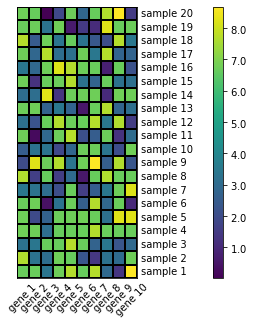

In [17]:
g = nhm(data=dfsmall, figsize=(6, 5))
fig, plots = g.run()

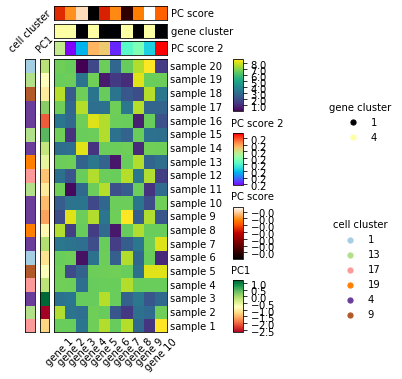

In [16]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

### Having the ytick show is a little annoying, so let's hide it.

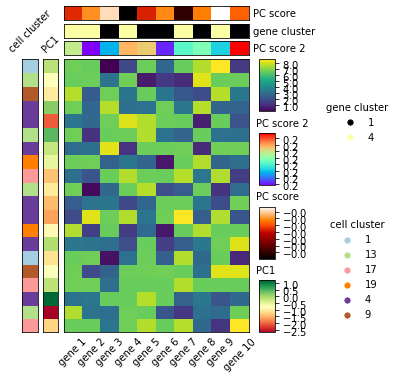

In [18]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps, showyticks=False)
fig, plots = g.run()

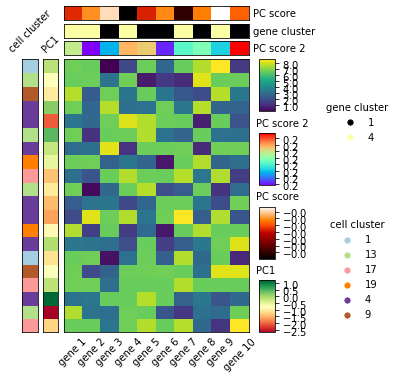

In [19]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps, showyticks=False)
fig, plots = g.run()

### Let's plot the larger dataframe and show all the colorbar and legends.

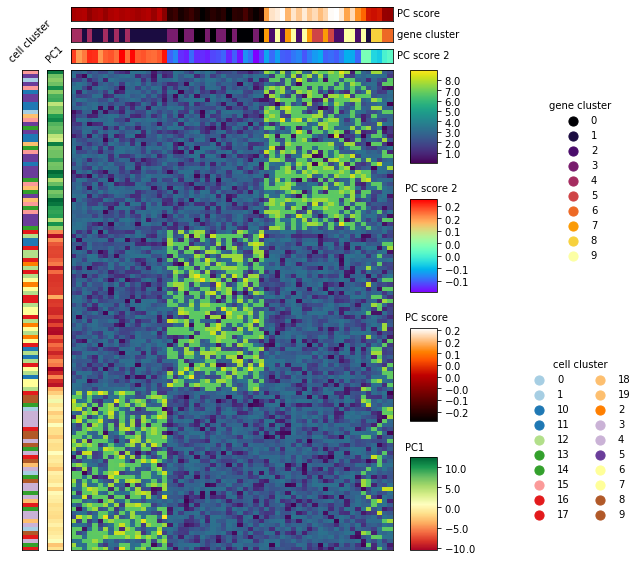

In [20]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, showxticks=False, cmaps=cmaps)
fig, plots = g.run()

### Add additional meta-column in real-time

In [21]:
dfc['New metadata'] = np.random.rand(dfc.shape[0])

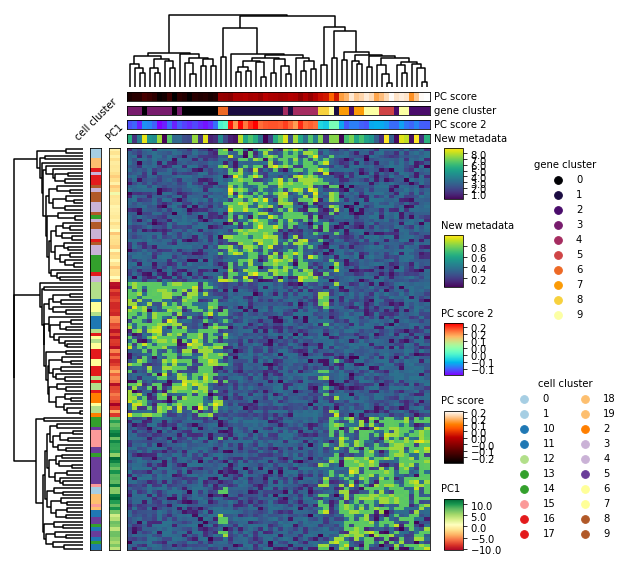

In [22]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster()
fig, plots = g.run()

### Additional options to color the dendrogram

In [23]:
rdendrogram_args = {'color_threshold':0.17}

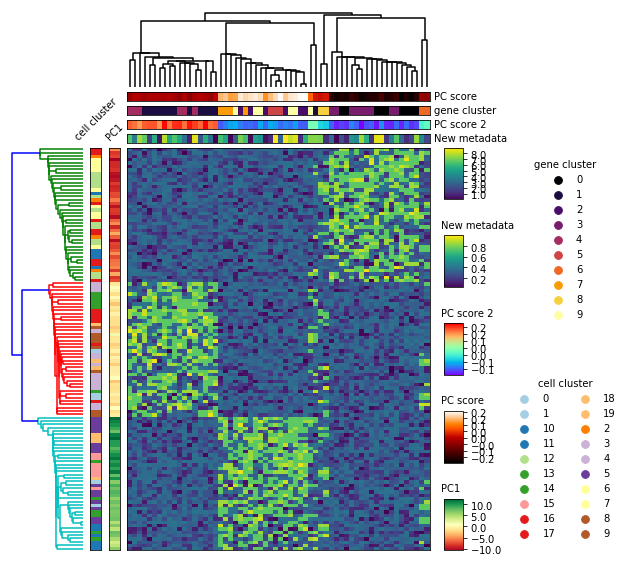

In [24]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(method='single', metric='cosine')
fig, plots = g.run(rdendrogram_args=rdendrogram_args)
fig.savefig('./examples/example1.png', bbox_inches='tight')

### The dendrogram details can be extracted

In [25]:
row_dendrogram = g.rdendrogram
col_dendrogram = g.cdendrogram